# <center> Does Fandango Still Inflate Their Movie Ratings
---

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest. He published his analysis in [this article](https://fivethirtyeight.com/features/fandango-movies-ratings/).
Hickey found that there's a significant discrepancy between the number of stars displayed for movie ratings and the actual rating, which he found via HTML of Fandango. He also found:

- The display ratings was the actual rating rounded up to the nearest half-star. 
- In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. 
- For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **The goal** of this project is to analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis in 2015.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Walt Hickey made the data he analyzed publicly available on [GitHub](https://github.com/fivethirtyeight/data).
We'll use the data he collected to analyze the characteristics of Fandango's rating system previous to his analysis. We aim to find whether there has been any change in Fandango's rating system after Hickey's analysis. The dataset we are working with comes from [here](https://www.freecodecamp.org/news/whose-reviews-should-you-trust-imdb-rotten-tomatoes-metacritic-or-fandango-7d1010c6cf19/). The github for the data is [here](https://github.com/mircealex/Movie_ratings_2016_17)


## Imports

In [1]:
%matplotlib inline

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [61]:
# Set styles
plt.rcParams["figure.figsize"]=12,6
plt.style.use('fivethirtyeight')

## Read Data

In [4]:
# Read data
before_hickey_import = pd.read_csv("fandango_score_comparison.csv")
before_hickey = before_hickey_import.copy()
before_hickey

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,4.0,4.0,4.35,3.90,...,3.70,4.5,4.0,3.5,4.0,3.5,33,7367,1348,0.0
142,'71 (2015),97,82,83,7.5,7.2,3.5,3.5,4.85,4.10,...,3.60,5.0,4.0,4.0,4.0,3.5,60,24116,192,0.0
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,3.5,3.5,4.85,3.90,...,3.70,5.0,4.0,4.5,4.5,3.5,123,24345,118,0.0
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,3.5,3.5,5.00,4.05,...,3.90,5.0,4.0,4.5,3.5,4.0,19,1955,59,0.0


In [5]:
# We are only looking at Fandango. Drop other website's data. 
before_hickey_edited = before_hickey[[
    'FILM',
    'Fandango_Stars', 
    'Fandango_Ratingvalue', 
    'Fandango_votes', 
    'Fandango_Difference']]

## Read in Second Data Source

In [6]:
after_hickey_import = pd.read_csv("movie_ratings_16_17.csv")
after_hickey = after_hickey_import.copy()
after_hickey

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,X-Men: Apocalypse,2016,52,7.1,48,67,4.0,2.60,3.55,2.40,3.35,2.5,3.5,2.5,3.5
210,XX,2017,64,4.7,71,17,3.0,3.20,2.35,3.55,0.85,3.0,2.5,3.5,1.0
211,xXx: Return of Xander Cage,2017,42,5.4,43,45,4.0,2.10,2.70,2.15,2.25,2.0,2.5,2.0,2.0
212,Zoolander 2,2016,34,4.8,23,21,2.5,1.70,2.40,1.15,1.05,1.5,2.5,1.0,1.0


In [7]:
# Edit columns of the dataset
after_hickey_edited = after_hickey[['movie', 'year', 'fandango']] 

## Examining the Datasets

Our goal is to determine whether there has been any change in Fandango's rating system after Hickey's analysis. The population of interest for our analysis is made of all the movie ratings stored on Fandango's website, regardless of the releasing year. Since we are working with samples of the population, we need to make sure they are representative of what we are analyzing. From Hickey's article and from the README.md of the data set's repository, we can see that he used the following sampling criteria: The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015). The sampling was not random (year = 2015, nratings >30)

The sampling conditions for the other sample were are also not random since: The movie must have been released in 2016 or later and the movie must have had a considerable number of votes and reviews.This second sample is also subject to temporal trends and it's unlikely to be representative of our population of interest.

Since both samples are not population samples, we should alter the goal of out analysis. Therefore the goal will change to find out the difference in fandango rantings for popular movies in 2015, when hickey's article came out, and popular movies in 2016, they year following the time the article came out. 

In [8]:
before_hickey_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FILM                  146 non-null    object 
 1   Fandango_Stars        146 non-null    float64
 2   Fandango_Ratingvalue  146 non-null    float64
 3   Fandango_votes        146 non-null    int64  
 4   Fandango_Difference   146 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 5.8+ KB


### Droping years outside 2015 & 2016

In [9]:
# Add a year column to before_hickey
before_hickey_edited["Year"] = before_hickey_edited["FILM"].str[-5:-1].copy()
before_hickey_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FILM                  146 non-null    object 
 1   Fandango_Stars        146 non-null    float64
 2   Fandango_Ratingvalue  146 non-null    float64
 3   Fandango_votes        146 non-null    int64  
 4   Fandango_Difference   146 non-null    float64
 5   Year                  146 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 7.0+ KB


In [10]:
# Only keep entries from year 2015
print(before_hickey_edited['Year'].unique())
before_hickey_2015 = before_hickey_edited[before_hickey_edited['Year'] == '2015']
before_hickey_2015["Year"].unique()

['2015' '2014']


array(['2015'], dtype=object)

In [11]:
# Check years in after_hickey
after_hickey_edited.info()
after_hickey_edited.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   movie     214 non-null    object 
 1   year      214 non-null    int64  
 2   fandango  214 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.1+ KB


Index(['movie', 'year', 'fandango'], dtype='object')

In [12]:
#change tpye int to str
after_hickey_edited['year'] = after_hickey_edited["year"].apply(str) 
after_hickey_edited['year'][0]

'2016'

In [13]:
# Keep only values where 'year' = 2016
after_hickey_2016 = after_hickey_edited.drop(after_hickey_edited[after_hickey_edited['year'] == '2017'].index)
print(after_hickey_2016['year'].unique())
after_hickey_2016

['2016']


,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0
...,...,...,...
207,Whiskey Tango Foxtrot,2016,3.5
208,Why Him?,2016,4.0
209,X-Men: Apocalypse,2016,4.0
212,Zoolander 2,2016,2.5


### Dropping Unpopular Movies 

In [14]:
# Drop non-popular ratings(< 30 ratings) 
before_hickey_2015 = before_hickey_2015[before_hickey_2015["Fandango_votes"] >= 30]
before_hickey_2015.sort_values('Fandango_votes')

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
39,Maps to the Stars (2015),3.5,3.1,35,0.4,2015
122,Tangerine (2015),4.0,3.9,36,0.1,2015
71,The Wrecking Crew (2015),4.5,4.2,38,0.3,2015
43,The Diary of a Teenage Girl (2015),4.0,3.6,38,0.4,2015
145,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,0.0,2015
...,...,...,...,...,...,...
140,Inside Out (2015),4.5,4.5,15749,0.0,2015
73,Furious 7 (2015),5.0,4.8,33538,0.2,2015
72,American Sniper (2015),5.0,4.8,34085,0.2,2015
130,Jurassic World (2015),4.5,4.5,34390,0.0,2015


Note: Hickey_after does not contain the number of reviews, and since Fandango is now owned by the same company that owns Rottentomatoes, the Fandango reviews do not exist. Therefore we are just going to assume for the sake of finishing a personal project that the movies in this dataset are condsidred popular movies. 

In [15]:
# before_hickey_edited['Fandango_Stars'].plot(kind = 'hist', bins = 100)
# after_hickey_2016['fandango'].plot(kind = 'hist', bins = 100, )
# before_hickey_edited['Fandango_Stars'].plot(kind = 'kde')

In [16]:
# sns.displot(before_hickey_edited['Fandango_Stars'], discrete = True, kde = True, bins = 6)

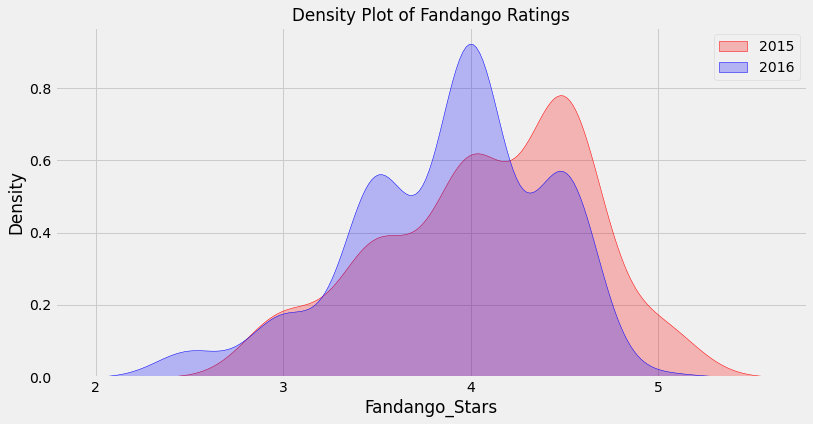

In [63]:
sns.kdeplot(before_hickey_2015['Fandango_Stars'], shade=True, color="r", label="2015")
sns.kdeplot(after_hickey_2016['fandango'], shade=True, color="b", label="2016")
plt.xticks(np.arange(2,5.1,1))
plt.title('Density Plot of Fandango Ratings', fontsize = 'large')
plt.legend()

plt.savefig("Density-plot-fandango-ratings")
plt.show()

In [18]:
# Frequency and Relative Frequencies % Distribution
before_freq = before_hickey_2015.groupby(["Fandango_Stars"]).count()


before_freq['relative'] = before_freq['FILM'] / before_freq['FILM'].sum()
before_freq

,FILM,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year,relative
Fandango_Stars,,,,,,
3.0,11,11,11,11,11,0.085271
3.5,23,23,23,23,23,0.178295
4.0,37,37,37,37,37,0.286822
4.5,49,49,49,49,49,0.379845
5.0,9,9,9,9,9,0.069767


In [19]:
after_freq = after_hickey_2016.groupby(["fandango"]).count()
after_freq['relative'] = after_freq['movie'] / after_freq['movie'].sum()
after_freq

,movie,year,relative
fandango,,,
2.5,6,6,0.031414
3.0,14,14,0.073298
3.5,46,46,0.240838
4.0,77,77,0.403141
4.5,47,47,0.246073
5.0,1,1,0.005236


Text(0.5, 0, 'Star Rating')

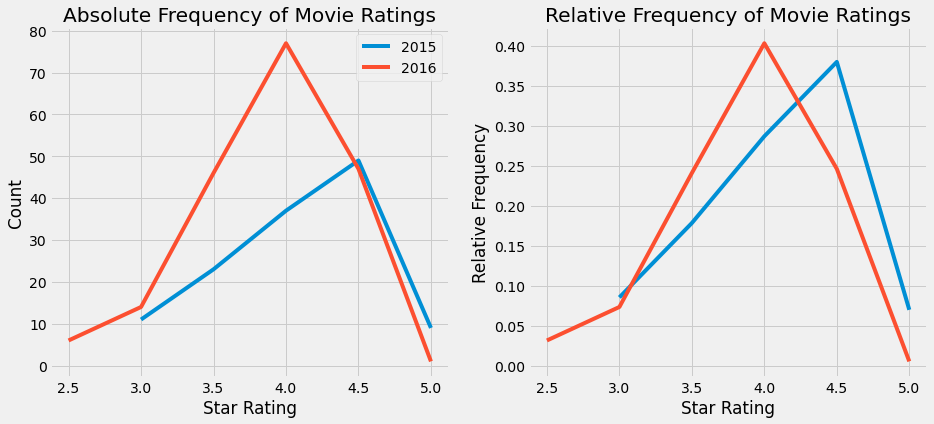

In [34]:
# Plot the frequecy
plt.subplot(121)
plt.plot(before_freq['FILM'], label = "2015")
plt.plot(after_freq["movie"], label = "2016")
plt.title("Absolute Frequency of Movie Ratings")
plt.ylabel("Count")
plt.xlabel("Star Rating")
plt.legend()

plt.subplot(122)
plt.plot(before_freq['relative'], label = "2015")
plt.plot(after_freq["relative"], label = "2016")
plt.title("Relative Frequency of Movie Ratings")
plt.ylabel("Relative Frequency")
plt.xlabel("Star Rating")

In [47]:
mean_2015=before_hickey_2015['Fandango_Stars'].mean()
mean_2016=after_hickey_2016['fandango'].mean()

median_2015=before_hickey_2015['Fandango_Stars'].median()
median_2016=after_hickey_2016['fandango'].median()

mode_2015=before_hickey_2015['Fandango_Stars'].mode()[0] # output adds the dtype, must slice mode output
mode_2016=after_hickey_2016['fandango'].mode()[0] # output adds the dtype, must slice mode output

# create empty df
summary_stats = pd.DataFrame()



# add columns
summary_stats['2015'] = [mean_2015,median_2015,mode_2015]
summary_stats['2016'] = [mean_2016,median_2016,mode_2016]

# set index
summary_stats.index = ['mean','median','mode']

summary_stats

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


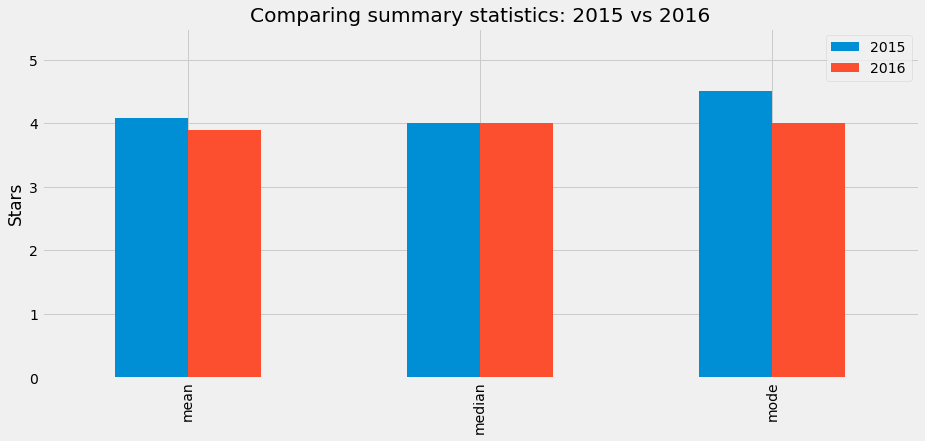

In [58]:
# plot the results
summary_stats.plot.bar()
plt.title('Comparing summary statistics: 2015 vs 2016')
plt.ylim(0,5.5)
plt.ylabel('Stars')
plt.show()

In [55]:
(summary_stats.loc['mean'][0] - summary_stats.loc['mean'][1]) / summary_stats.loc['mean'][0]

0.04842683568951993

# Conclusion

While the median is the same for both distributions, the mode is lower in 2016 by 0.5. Coupled with what we saw for the mean, the direction of the change we saw on the kernel density plot is confirmed: on average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015.

We cannot be completely sure what caused the change, but the chances are very high that it was caused by Fandango fixing the biased rating system after Hickey's analysis.